<font size="+5">#03. Decision Tree. A Supervised Classification Model</font>

# Load the Data

Load the dataset from [CIS](https://www.cis.es/cis/opencms/ES/index.html) executing the lines of code below:
> - The goal of this dataset is
> - To predict `internet_usage` of **people** (rows)
> - Based on their **socio-demographical characteristics** (columns)

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/py-thocrates/data/main/internet_usage_spain.csv'

df = pd.read_csv(url)
df.head()

,internet_usage,sex,age,education
0,0,Female,66,Elementary
1,1,Male,72,Elementary
2,1,Male,48,University
3,0,Male,59,PhD
4,1,Female,44,PhD


# Data Preprocessing

> - Categorical variables contains `text`
> - If you pass the data to the model
> - It won't know how to interpret the text
> - Therefore, you need a way to convert text values
> - To numbers such as `0` or `1` **Dummy Variables**
> - Which `function()` do you use to achieve this?

In [2]:
df = pd.get_dummies(data=df, drop_first=True)
df.head()

,internet_usage,age,sex_Male,education_High School,education_Higher Level,education_No studies,education_PhD,education_University
0,0,66,0,0,0,0,0,0
1,1,72,1,0,0,0,0,0
2,1,48,1,0,0,0,0,1
3,0,59,1,0,0,0,1,0
4,1,44,0,0,0,0,1,0


# `DecisionTreeClassifier()` Model in Python

## Build the Model

> 1. **Necesity**: Build Model
> 2. **Google**: How do you search for the solution?
> 3. **Solution**: Find the `function()` that makes it happen

In [3]:
explanatory=df.drop(columns='internet_usage')
target = df.internet_usage

explanatory

,age,sex_Male,education_High School,education_Higher Level,education_No studies,education_PhD,education_University
0,66,0,0,0,0,0,0
1,72,1,0,0,0,0,0
2,48,1,0,0,0,0,1
3,59,1,0,0,0,1,0
4,44,0,0,0,0,1,0
...,...,...,...,...,...,...,...
2450,43,1,0,0,0,0,0
2451,18,0,1,0,0,0,0
2452,54,0,0,0,0,0,0
2453,31,1,1,0,0,0,0


In [4]:
target

0       0
1       1
2       1
3       0
4       1
       ..
2450    1
2451    1
2452    0
2453    1
2454    0
Name: internet_usage, Length: 2455, dtype: int64

## Code Thinking

> - By the time you get to the actual `function()` to compute the model
> - You'll notice they're asking you for two parameters:
> 1. `X`: **explanatory variables**
> 2. `y`: **target varaible**

### Finally `fit()` the Model

> - Pass the `objects` that **contains the sequence of numbers** of the two variables
> - To the `parameters` of the function that computes the Linear Regression Model

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
model=DecisionTreeClassifier()

In [7]:
model.fit(X=explanatory,y=target)

DecisionTreeClassifier()

In [8]:
model.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['age', 'sex_Male', 'education_High School',
        'education_Higher Level', 'education_No studies', 'education_PhD',
        'education_University'], dtype=object),
 'n_features_in_': 7,
 'n_outputs_': 1,
 'classes_': array([0, 1]),
 'n_classes_': 2,
 'max_features_': 7,
 'tree_': <sklearn.tree._tree.Tree at 0x1421aa880>}

## Make a Prediction

> You should already know that ML models are
> mathematical equations that you optimize to
> calculate predictions
>
> As you `fit()` the model, the mathematical function
> is built. Therefore, could you make a prediction?
>
> - Select a random person:

> - Compute the probability of this person for `internet_usage`:

In [9]:
person = df.sample()
person

,internet_usage,age,sex_Male,education_High School,education_Higher Level,education_No studies,education_PhD,education_University
1497,1,50,1,0,0,0,1,0


In [10]:
person_exp=person.drop(columns='internet_usage')


In [11]:
model.predict_proba(X=person_exp)

array([[0., 1.]])

## Visualize the Model

> 1. Use `plot_tree()`, contained in `tree` module from `sklearn` library
> 2. Then, you may use `[shift] + [tab]` to see what **parameters** the function is asking for

In [12]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [17]:
type(explanatory)

pandas.core.frame.DataFrame

In [ ]:
columnas = ['age', 'sex_Male',...]

In [21]:
explanatory.columns

Index(['age', 'sex_Male', 'education_High School', 'education_Higher Level',
       'education_No studies', 'education_PhD', 'education_University'],
      dtype='object')

In [22]:
explanatory

,age,sex_Male,education_High School,education_Higher Level,education_No studies,education_PhD,education_University
0,66,0,0,0,0,0,0
1,72,1,0,0,0,0,0
2,48,1,0,0,0,0,1
3,59,1,0,0,0,1,0
4,44,0,0,0,0,1,0
...,...,...,...,...,...,...,...
2450,43,1,0,0,0,0,0
2451,18,0,1,0,0,0,0
2452,54,0,0,0,0,0,0
2453,31,1,1,0,0,0,0


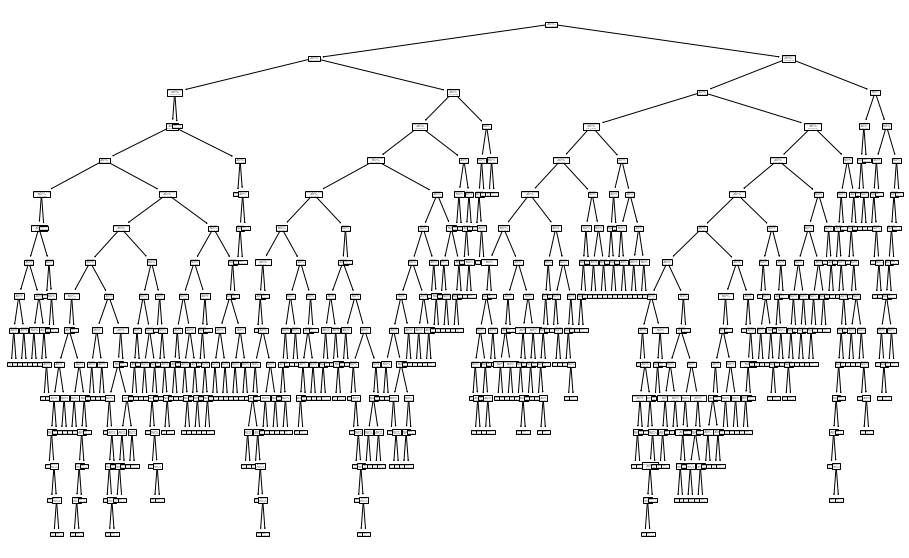

In [20]:
plt.figure(figsize=(16,10))
plot_tree(decision_tree=model, feature_names=explanatory.columns);

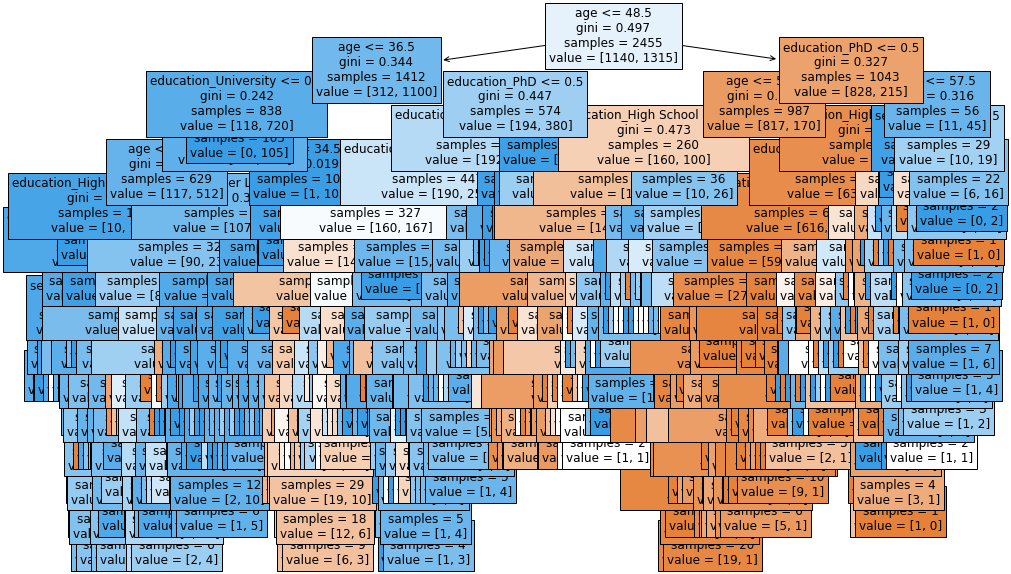

In [23]:
plt.figure(figsize=(16,10))
plot_tree(decision_tree=model, feature_names=explanatory.columns, filled=True, fontsize=12);

> - Could you justify how we got to the prediction in previous exercise?

### Select a random person:



In [24]:
person


,internet_usage,age,sex_Male,education_High School,education_Higher Level,education_No studies,education_PhD,education_University
1497,1,50,1,0,0,0,1,0


### Compute the probability of this person for internet_usage:

In [28]:
person

,internet_usage,age,sex_Male,education_High School,education_Higher Level,education_No studies,education_PhD,education_University
1497,1,50,1,0,0,0,1,0


In [26]:
model.predict_proba(X=person)

/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- internet_usage
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 8 features, but DecisionTreeClassifier is expecting 7 features as input.

In [27]:
person

,internet_usage,age,sex_Male,education_High School,education_Higher Level,education_No studies,education_PhD,education_University
1497,1,50,1,0,0,0,1,0


In [25]:
model.predict_proba(X=person_exp)

array([[0., 1.]])

# Decision Tree Algorithm Explanation

> _You may watch the following video to understand how the Decision Tree works:_

In [6]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/7VeUPuFGJHk" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# Model Interpretation

> - Which is the variable in the **root node**?
> - Is it the most **important feature**? Why?

# Real vs. Predicted Data

> - Compute all predictions:
>
> - `model.predict()`

In [29]:
model.predict(X=explanatory)
y_pred=model.predict(X=explanatory)
y_pred

array([0, 0, 1, ..., 0, 1, 0])

> How good is our model?
>
> 1. Create a new `DataFrame` column to assign the predictions.
>
> - `df['pred'] = predictions`

In [30]:
dfsel=df[['internet_usage']].copy()
dfsel
dfsel['pred_dt']=y_pred


> - `df.sample(10)` to check if predictions are equal to reality:

In [40]:
total = 100

In [41]:
sin_covid = 90

In [42]:
con_covid = 10

In [43]:
total_predicciones_no_covid=100

In [44]:
precision = 90/100

In [45]:
precision

0.9

In [46]:
sensibilidad = 0

In [48]:
sensibilidad

0

In [49]:
especificidad = 100/100

In [50]:
especificidad

1.0

In [39]:
dfsel.internet_usage.value_counts()

1    1315
0    1140
Name: internet_usage, dtype: int64

In [31]:
dfsel.sample(10)

,internet_usage,pred_dt
1666,1,1
313,1,1
1074,1,1
2199,1,0
2213,1,1
1824,0,0
2082,0,0
2262,1,1
2294,0,1
2278,1,1


> 2. How to measure the **model's error**?
> - How good is our model to predict reality?
> - `model.score()`

In [32]:
model.score(X=explanatory,y=target)

0.859877800407332

# Confusion Matrix

> 1. Use function `confusion_matrix()`, or `plot_confusion_matrix()`
> 2. What represents the first number in the matrix?

/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


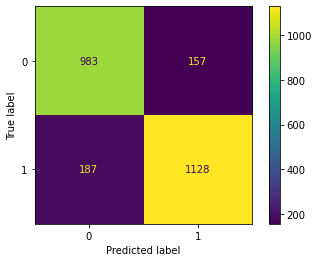

In [33]:
from sklearn.metrics import plot_confusion_matrix
y_true=df.internet_usage
y_pred=dfsel['pred_dt']
plot_confusion_matrix(estimator=model,X=explanatory,y_true=target)


# Other Metrics

## Sensitivity

In [34]:
covid_real=187 + 1128
covid_predicho_reales=1128
covid_predicho_reales/covid_real 

0.8577946768060837

## Specificity

In [35]:
no_covid_real= 983 + 157
no_covid_predicho_no_covid= 983
no_covid_predicho_no_covid/no_covid_real

0.862280701754386

## Classification Report

> 1. Use `classification_report()`
> 2. Save the resulting object in `report`
> 3. `print(report)`
> 4. Are some numbers equal to the ones we calculated before (Sensitivity & Specificity?

In [36]:
from sklearn.metrics import classification_report
classification_report(y_true=target,y_pred=dfsel.pred_dt)
report=classification_report(y_true=target,y_pred=dfsel.pred_dt)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1140
           1       0.88      0.86      0.87      1315

    accuracy                           0.86      2455
   macro avg       0.86      0.86      0.86      2455
weighted avg       0.86      0.86      0.86      2455



## ROC Curve

> - Use `plot_roc_curve()`
>
> _You may watch the following video to understand the metric:_

/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


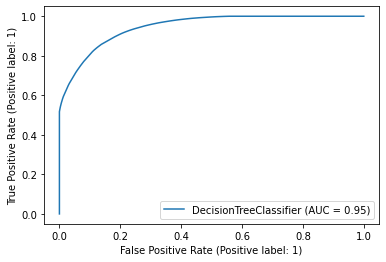

In [37]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(estimator=model,X=explanatory,y=target)

In [51]:
explanatory

,age,sex_Male,education_High School,education_Higher Level,education_No studies,education_PhD,education_University
0,66,0,0,0,0,0,0
1,72,1,0,0,0,0,0
2,48,1,0,0,0,0,1
3,59,1,0,0,0,1,0
4,44,0,0,0,0,1,0
...,...,...,...,...,...,...,...
2450,43,1,0,0,0,0,0
2451,18,0,1,0,0,0,0
2452,54,0,0,0,0,0,0
2453,31,1,1,0,0,0,0


In [53]:
type(explanatory)

pandas.core.frame.DataFrame

In [54]:
type(target)

pandas.core.series.Series

In [56]:
explanatory.sex_Male

0       0
1       1
2       1
3       1
4       0
       ..
2450    1
2451    0
2452    0
2453    1
2454    1
Name: sex_Male, Length: 2455, dtype: uint8

In [52]:
target

0       0
1       1
2       1
3       0
4       1
       ..
2450    1
2451    1
2452    0
2453    1
2454    0
Name: internet_usage, Length: 2455, dtype: int64

`SVC()` el modelo

In [57]:
model = DecisionTreeClassifier()

In [58]:
import pandas as pd

In [59]:
import numpy as np

In [60]:
import seaborn as sns

In [ ]:
model.fit(

In [66]:
from sklearn.svm import NuSVC

In [67]:
MODEL = NuSVC()

In [ ]:
MODEL.fi

In [65]:
SVC()

SVC()

In [69]:
model = SVC()

In [70]:
X = explanatory
y = target

In [ ]:
model.fit(y, X)

In [71]:
model.fit(X=y, y=X)

ValueError: Expected 2D array, got 1D array instead:
array=[0. 1. 1. ... 0. 1. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [72]:
model.fit(X, y)

SVC()

In [74]:
model.predict(

array([0, 0, 1, ..., 0, 1, 0])

In [80]:
a = df['internet_usage']

In [81]:
a['b'] = 2

/var/folders/24/tg28vxls25l9mjvqrnh0plc80000gn/T/ipykernel_82582/1341180516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['b'] = 2


In [82]:
a

0       0
1       1
2       1
3       0
4       1
       ..
2451    1
2452    0
2453    1
2454    0
b       2
Name: internet_usage, Length: 2456, dtype: int64

In [83]:
a = df[['internet_usage']]

In [85]:
a['hola'] = 2

/var/folders/24/tg28vxls25l9mjvqrnh0plc80000gn/T/ipykernel_82582/2559442557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['hola'] = 2


In [86]:
a

,internet_usage,hola
0,0,2
1,1,2
2,1,2
3,0,2
4,1,2
...,...,...
2450,1,2
2451,1,2
2452,0,2
2453,1,2


In [75]:
dfsel['internet_usage']

0       0
1       1
2       1
3       0
4       1
       ..
2450    1
2451    1
2452    0
2453    1
2454    0
Name: internet_usage, Length: 2455, dtype: int64

In [76]:
dfsel['a'] = 2

In [77]:
dfsel

,internet_usage,pred_dt,a
0,0,0,2
1,1,0,2
2,1,1,2
3,0,0,2
4,1,1,2
...,...,...,...
2450,1,0,2
2451,1,1,2
2452,0,0,2
2453,1,1,2


In [103]:
dfsel = df[['internet_usage']].copy()

In [104]:
dfsel['pred_svc'] = model.predict(X)

In [73]:
dfsel model.predict(X)

,internet_usage,pred_dt
0,0,0
1,1,0
2,1,1
3,0,0
4,1,1
...,...,...
2450,1,0
2451,1,1
2452,0,0
2453,1,1


In [38]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/4jRBRDbJemM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# Achieved Goals

_Haz doble click sobre esta celda y pon una `X` dentro de las casillas [X] si crees que has superado los objetivos:_

- [X] Entender cómo se usan los **Algoritmos de Árboles**.
- [X] Entender otra forma de **comparar los datos reales con las predicciones** del modelo.
- [ ] No todas las visualizaciones de modelos son iguales. En este caso también podemos **visualizar un árbol** para interpretar el modelo.
- [ ] Distinguir el papel de la **probabilidad** a la hora de optimizar este tipo de modelos.
- [ ] Saber determinar **por qué una variable es importante** en el modelo. Es decir, por qué aporta diferencias significativas.
- [ ] Entender la necesidad de **normalizar** los datos.

In [87]:
a = ['hola']

In [88]:
b = a

In [89]:
a

['hola']

In [90]:
b.append('adios')

In [91]:
b

['hola', 'adios']

In [92]:
a

['hola', 'adios']

In [93]:
a = ['hola']

In [94]:
b = a.copy()

In [95]:
a

['hola']

In [96]:
b.append('adios')

In [97]:
b

['hola', 'adios']

In [98]:
a

['hola']